<a href="https://colab.research.google.com/github/iamsomendas/Rainfall-prediction/blob/main/Kidney_stone_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone

100% 1.51G/1.52G [00:46<00:00, 36.1MB/s]
100% 1.52G/1.52G [00:46<00:00, 35.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/ct-kidney-dataset-normal-cyst-tumor-and-stone.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os
import tensorflow as tf
import cv2

In [ ]:
image_path = ('/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')
for folder in os.listdir(image_path):
    list_of_elements = os.listdir(os.path.join(image_path, folder))
    print(f'Folder: {folder} = {len(list_of_elements)} images\n')

Folder: Tumor = 2283 images

Folder: Stone = 1377 images

Folder: Cyst = 3709 images

Folder: Normal = 5077 images



In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio(
    r"/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
    output="./data",
    seed=7,
    ratio=(0.8,0.1,0.1),
    group_prefix=None
)

Copying files: 12446 files [00:18, 672.39 files/s]


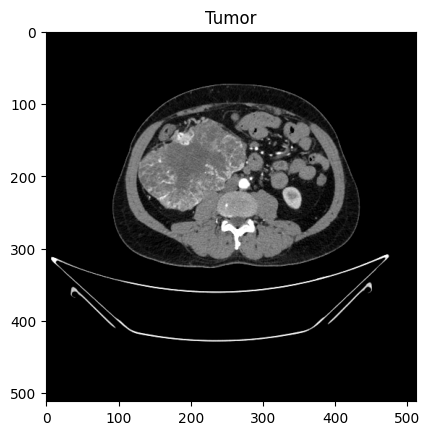

In [ ]:
img1 = cv2.imread("/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (98).jpg")
plt.title('Tumor')
plt.imshow(img1)

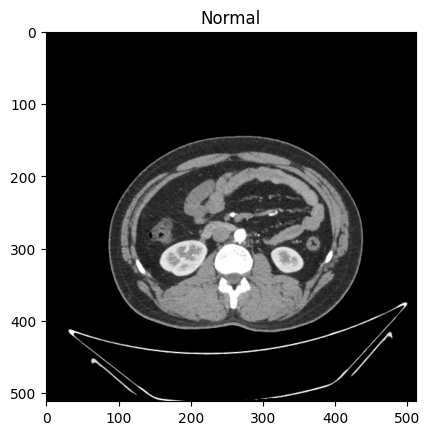

In [ ]:
img3 = cv2.imread("/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (974).jpg")
plt.title('Normal')
plt.imshow(img3)

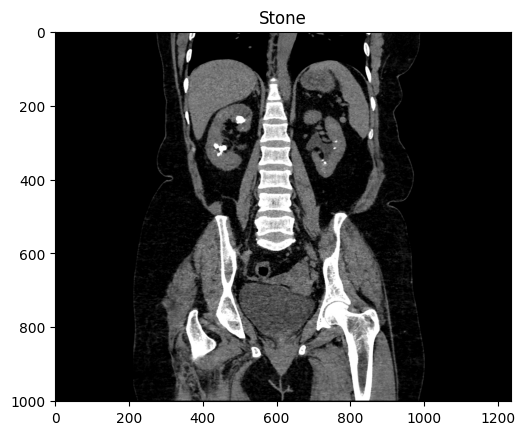

In [ ]:
img2 = cv2.imread(r"/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/Stone- (99).jpg")
plt.title('Stone')
plt.imshow(img2)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator(rescale = 1/255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range = 0.2,
    vertical_flip=True,
    horizontal_flip = True,
    fill_mode="reflect")

val_data = ImageDataGenerator(rescale = 1/255.0)

train_gen = train_data.flow_from_directory(
    './data/train',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size = 64
)

val_gen = train_data.flow_from_directory(
     './data/val',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size = 64
)

Found 9955 images belonging to 4 classes.
Found 1242 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model
given_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the pretrained model
for layer in given_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of VGG16
top_model = Flatten()(given_model.output)
top_model = Dense(300, activation='relu')(top_model)
top_model = Dense(4, activation='softmax')(top_model)

# Create the final model by combining the VGG16 base and custom top
model = Model(inputs=given_model.input, outputs=top_model)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_gen, steps_per_epoch=len(train_gen), epochs=40, validation_data=val_gen)

Epoch 1/40
156/156 [==============================] - 218s 1s/step - loss: 1.1629 - accuracy: 0.6759 - val_loss: 0.5367 - val_accuracy: 0.8148
Epoch 2/40
156/156 [==============================] - 179s 1s/step - loss: 0.4483 - accuracy: 0.8432 - val_loss: 0.3621 - val_accuracy: 0.8776
Epoch 3/40
156/156 [==============================] - 176s 1s/step - loss: 0.3381 - accuracy: 0.8843 - val_loss: 0.2839 - val_accuracy: 0.9050
Epoch 4/40
156/156 [==============================] - 177s 1s/step - loss: 0.2838 - accuracy: 0.8968 - val_loss: 0.2541 - val_accuracy: 0.9050
Epoch 5/40
156/156 [==============================] - 176s 1s/step - loss: 0.2503 - accuracy: 0.9123 - val_loss: 0.2994 - val_accuracy: 0.8720
Epoch 6/40
156/156 [==============================] - 174s 1s/step - loss: 0.2261 - accuracy: 0.9182 - val_loss: 0.1742 - val_accuracy: 0.9380
Epoch 7/40
156/156 [==============================] - 176s 1s/step - loss: 0.1735 - accuracy: 0.9408 - val_loss: 0.1417 - val_accuracy: 0.9614

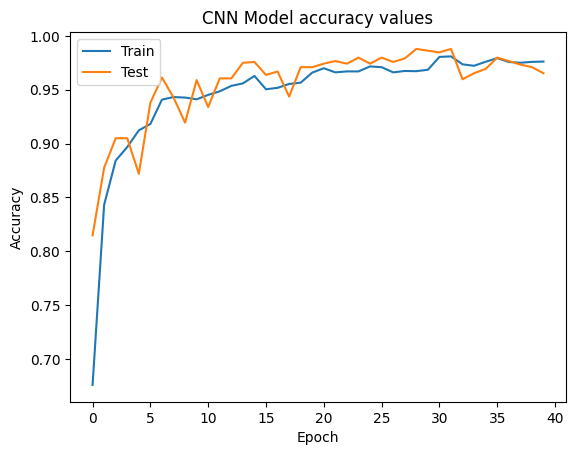

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

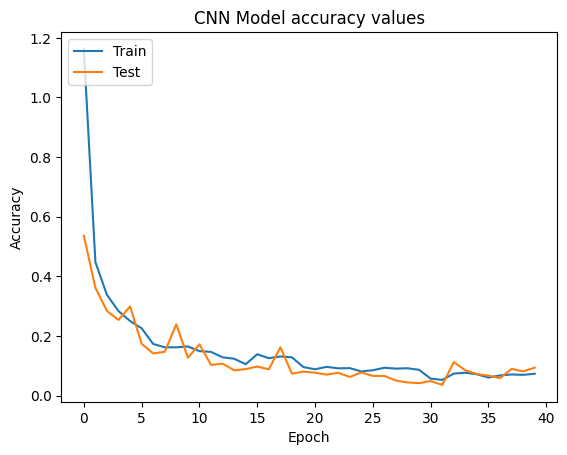

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
test_data = ImageDataGenerator(rescale = 1/255.0)


test_gen = train_data.flow_from_directory(
     './data/test',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size = 64,shuffle = False)

Found 1249 images belonging to 4 classes.


In [ ]:
pred = model.predict_generator(test_gen)

<ipython-input-10-ee7734aca27d>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_gen)


In [ ]:
evaluation_results = model.evaluate_generator(test_gen)

<ipython-input-11-84ca2de597df>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluation_results = model.evaluate_generator(test_gen)


In [ ]:
print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Test Loss: 0.0959915965795517
Test Accuracy: 0.9687750339508057


In [ ]:
y_pred = np.argmax(pred, axis = 1)
y_true = test_gen.classes

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[370,   1,   1,   0],
       [  3, 490,  12,   4],
       [  6,   1, 131,   1],
       [  5,   4,   2, 218]])